# LayerIV - Assignment

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_excel("layeriv_regression_data.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


## High Level View

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


## Lets plot the data ( scatter plot )

In [6]:
x = np.array(df.X)
y = np.array(df.Y)

Text(0, 0.5, 'Y - Dependent Variable')

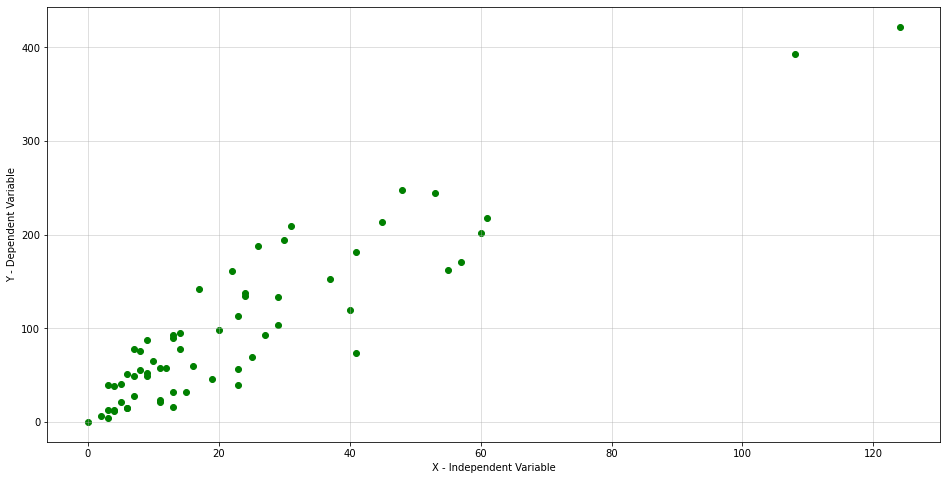

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(x, y, color = 'green')
plt.grid(alpha=0.5)
plt.xlabel("X - Independent Variable")
plt.ylabel("Y - Dependent Variable")

## Let's Begin Exploratory Data Analysis

In [8]:
df.isnull().sum()

X    0
Y    0
dtype: int64

### There does not seem to be any missing/null values & we can proceed further by applying ML Regression 

## ML Model

### Linear Regression

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i2.wp.com/contentsimplicity.com/wp-content/uploads/2019/05/18d7e-1eieyrsqib85cpa32zapqwq.png?w=1080&ssl=1")

In [10]:
x = df['X']
y = df['Y']

In [11]:
x

0     108
1      19
2      13
3     124
4      40
     ... 
58      9
59     31
60     14
61     53
62     26
Name: X, Length: 63, dtype: int64

In [12]:
y

0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
      ...  
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name: Y, Length: 63, dtype: float64

### Split data into training and testing with 75% being used for training 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 100)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.intercept_

19.517914503152312

In [19]:
lr.coef_

array([3.34801793])

In [20]:
y_pred = lr.predict(x_test)

In [21]:
len(y_pred)

16

### How close are the Predicted & Actual Values

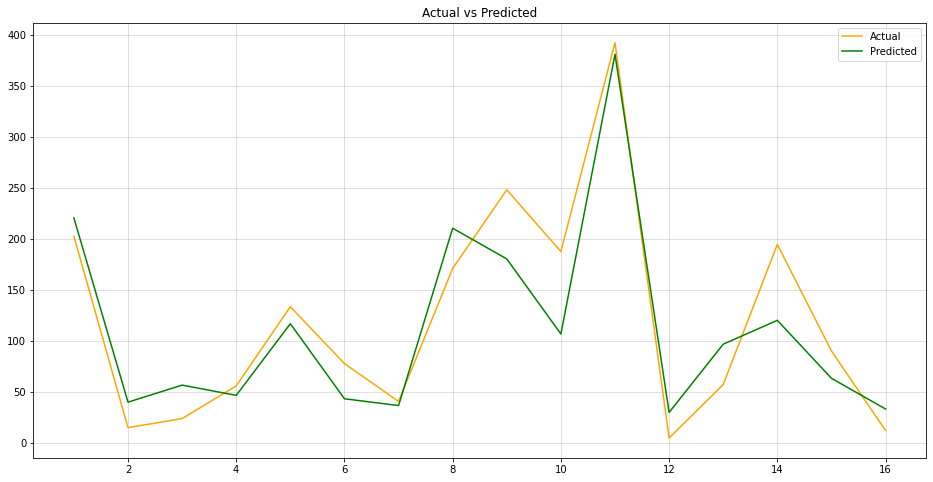

In [22]:
plt.figure(figsize=(16,8))
c = [i for i in range(1,17,1)]
plt.plot(c,y_test, color = 'orange', label="Actual")
plt.plot(c,y_pred, color = 'green', label="Predicted")
plt.title("Actual vs Predicted")
plt.grid(alpha = 0.5)
plt.legend()

### How Error teams are varying from 0

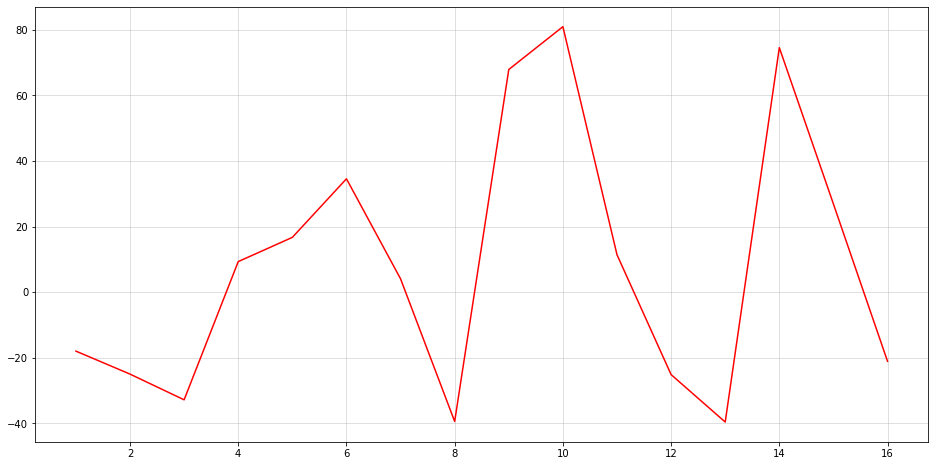

In [23]:
plt.figure(figsize=(16,8))
c = [i for i in range(1,17,1)]
plt.plot(c, y_test-y_pred, color = 'red')
plt.grid(alpha = 0.5)

In [24]:
Image(url= "https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG")

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
print("The Mean Square Error = ",mse)

The Mean Square Error =  1585.8431496914159


In [26]:
Image(url= "https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png")

In [27]:
rse = r2_score(y_test,y_pred)
print("The Root Mean Square Error = ",rse)

The Root Mean Square Error =  0.8533311913881665


In [28]:
m = lr.coef_
c = lr.intercept_

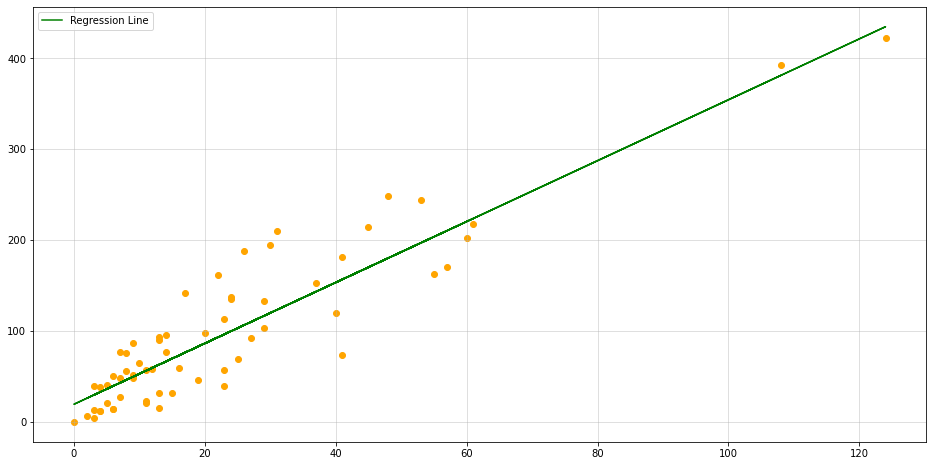

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(x, y, color = 'orange')
plt.plot(x, m*x+c, color='green', label = 'Regression Line')
plt.grid(alpha=0.5)
plt.legend()

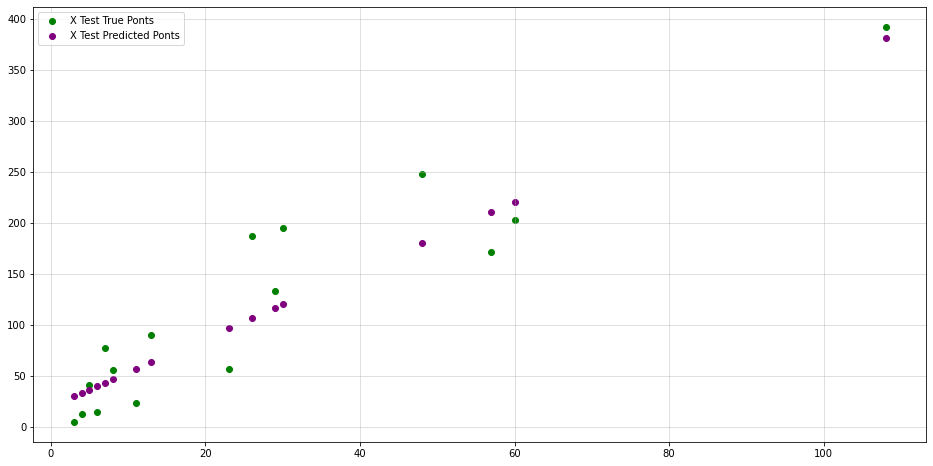

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(x_test,y_test, color='green', label = "X Test True Ponts")
plt.scatter(x_test,y_pred, color='purple', label = "X Test Predicted Ponts")
plt.grid(alpha=0.5)
plt.legend()

In [33]:
custom_input = float(input("Enter a number = "))

Enter a number = 30


In [34]:
print("Predicted value for {} = {}".format(custom_input,round(lr.predict([[custom_input]])[0],2)))

Predicted value for 30.0 = 119.96


### Now let's try out Decision Tree Regressor 

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred_dt = dt_model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
print('The Root Mean Square Error =',r2_score(y_test, y_pred_dt))

The Root Mean Square Error = 0.819524086803301


### Now let's try out RandomForest Regressor 

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=150, min_samples_split=2)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [39]:
y_pred_rg = regressor.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
print('R_Squared Score = ',r2_score(y_test, y_pred_rg))

R_Squared Score =  0.8599364476215048


### Let's compare the Regression models

* Linear Regression Model = 0.85
* Decision Tree Model = 0.81
* Random Forrest Model = 0.84

  Simple Linear Regression model seems to perform well in this case 

### Now let's check range for 95% confidence interval

In [41]:
import numpy as np
import scipy.stats

In [42]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h 

In [43]:
mean, lower, upper = mean_confidence_interval(y)

In [44]:
mean

98.18730158730159

In [45]:
lower

76.19414226971514

In [46]:
upper

120.18046090488804

# ---------------------------------------------------------------------------------------------------------------